In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Khảo sát các siêu tham số của mô hình**

In [ ]:
data_path = "/content/drive/MyDrive/AI/data/data1.xlsx"

max_depth: 5, Average Train Accuracy: 0.9464, Average Test Accuracy: 0.9391
max_depth: 10, Average Train Accuracy: 0.9926, Average Test Accuracy: 0.9739
max_depth: 15, Average Train Accuracy: 0.9998, Average Test Accuracy: 0.9793
max_depth: 20, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801
max_depth: 25, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801
max_depth: 30, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801
max_depth: 35, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801


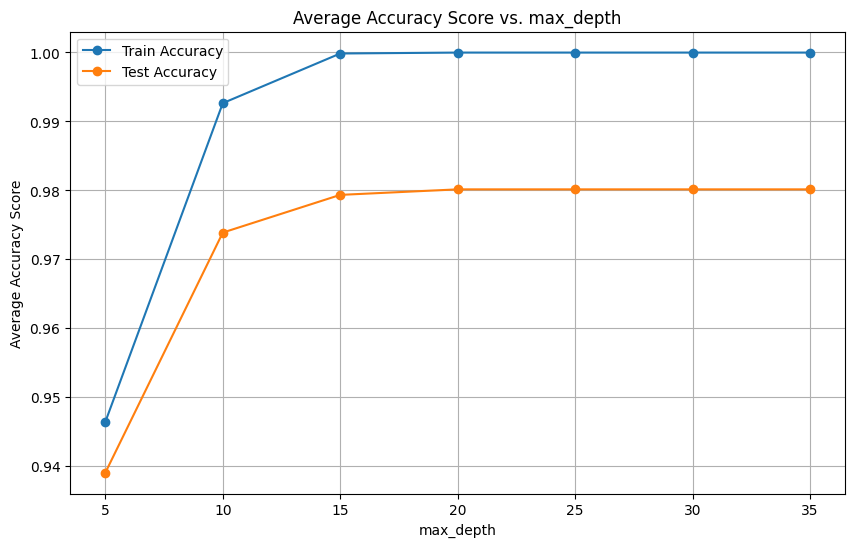

min_samples_split: 2, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801
min_samples_split: 4, Average Train Accuracy: 0.9997, Average Test Accuracy: 0.9789
min_samples_split: 6, Average Train Accuracy: 0.9987, Average Test Accuracy: 0.9799
min_samples_split: 8, Average Train Accuracy: 0.9974, Average Test Accuracy: 0.9772
min_samples_split: 10, Average Train Accuracy: 0.9962, Average Test Accuracy: 0.9753
min_samples_split: 12, Average Train Accuracy: 0.9952, Average Test Accuracy: 0.9748
min_samples_split: 14, Average Train Accuracy: 0.9937, Average Test Accuracy: 0.9723
min_samples_split: 16, Average Train Accuracy: 0.9917, Average Test Accuracy: 0.9728
min_samples_split: 18, Average Train Accuracy: 0.9907, Average Test Accuracy: 0.9721
min_samples_split: 20, Average Train Accuracy: 0.9888, Average Test Accuracy: 0.9724


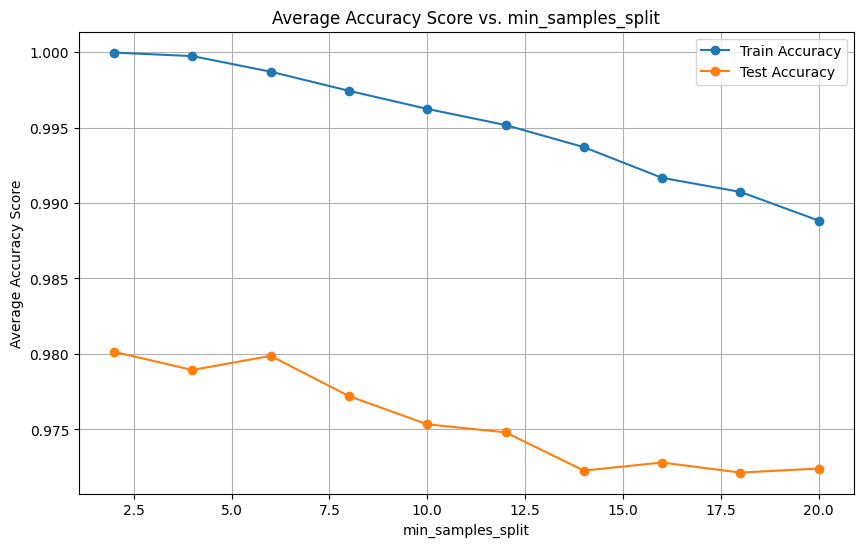

min_samples_leaf: 1, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801
min_samples_leaf: 3, Average Train Accuracy: 0.9945, Average Test Accuracy: 0.9753
min_samples_leaf: 5, Average Train Accuracy: 0.9875, Average Test Accuracy: 0.9705
min_samples_leaf: 7, Average Train Accuracy: 0.9812, Average Test Accuracy: 0.9673
min_samples_leaf: 9, Average Train Accuracy: 0.9760, Average Test Accuracy: 0.9633
min_samples_leaf: 11, Average Train Accuracy: 0.9725, Average Test Accuracy: 0.9615
min_samples_leaf: 13, Average Train Accuracy: 0.9691, Average Test Accuracy: 0.9577
min_samples_leaf: 15, Average Train Accuracy: 0.9667, Average Test Accuracy: 0.9560
min_samples_leaf: 17, Average Train Accuracy: 0.9645, Average Test Accuracy: 0.9536
min_samples_leaf: 19, Average Train Accuracy: 0.9613, Average Test Accuracy: 0.9521


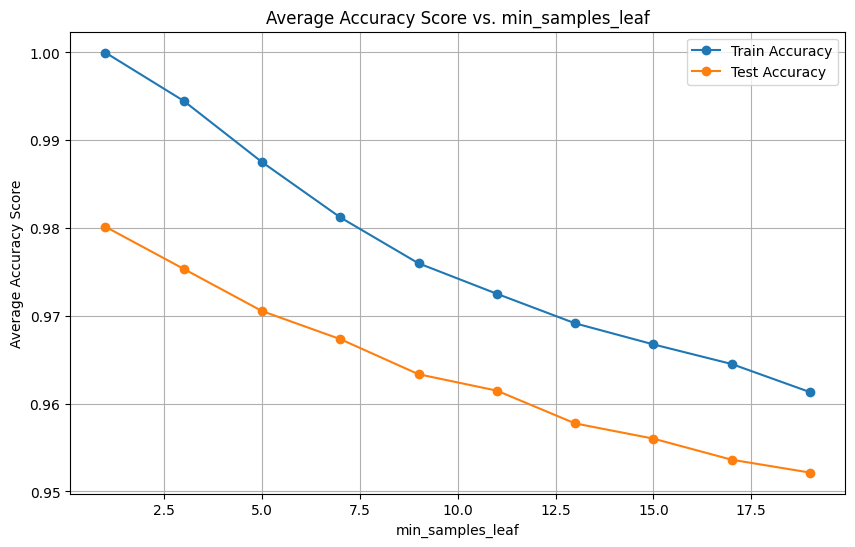

n_estimators: 50, Average Train Accuracy: 0.9999, Average Test Accuracy: 0.9796
n_estimators: 100, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801
n_estimators: 150, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9811
n_estimators: 200, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9809
n_estimators: 250, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9804
n_estimators: 300, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9804
n_estimators: 350, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9804
n_estimators: 400, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9801
n_estimators: 450, Average Train Accuracy: 1.0000, Average Test Accuracy: 0.9804


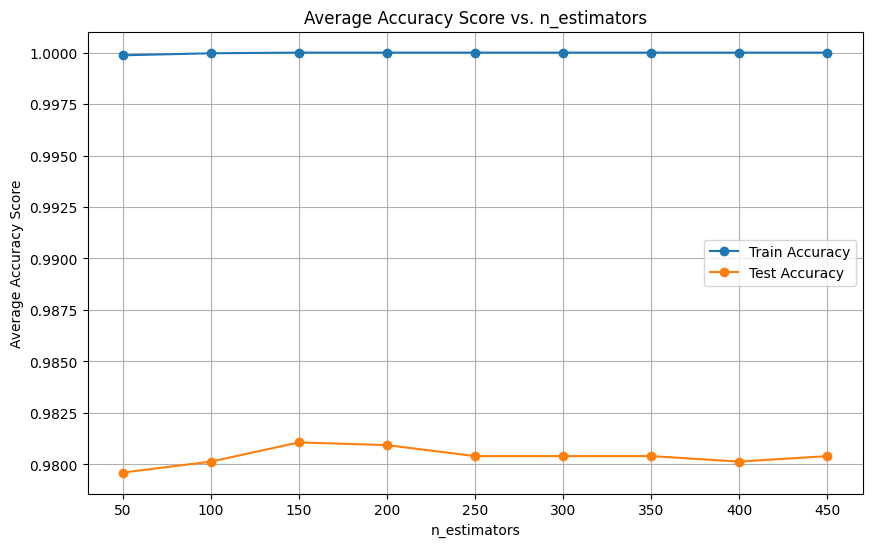

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn đến dữ liệu
data_path = "/content/drive/MyDrive/AI/data/data1.xlsx"
df = pd.read_excel(data_path)
NUM_BAND = 13

# Xác định các cột chứa dữ liệu đặc trưng (band) và nhãn
X_labels = [f'B{i}' for i in range(1, NUM_BAND+1)]
y_label = 'Label'
X = df[X_labels]
y = df[y_label]

# Thiết lập Stratified K-Fold với 5 fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List of max_depth to evaluate
max_depth_list = range(5, 40, 5)
average_train_accuracies_depth = []
average_test_accuracies_depth = []

# Đánh giá RandomForestClassifier cho từng max_depth
for max_depth in max_depth_list:
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = RandomForestClassifier(max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))

    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    average_train_accuracies_depth.append(average_train_accuracy)
    average_test_accuracies_depth.append(average_test_accuracy)

    print(f"max_depth: {max_depth}, Average Train Accuracy: {average_train_accuracy:.4f}, Average Test Accuracy: {average_test_accuracy:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(max_depth_list, average_train_accuracies_depth, marker='o', label='Train Accuracy')
plt.plot(max_depth_list, average_test_accuracies_depth, marker='o', label='Test Accuracy')
plt.title('Average Accuracy Score vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Average Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

# List of min_samples_split to evaluate
min_samples_split_list = range(2, 21, 2)
average_train_accuracies_split = []
average_test_accuracies_split = []

# Đánh giá RandomForestClassifier cho từng min_samples_split
for min_samples_split in min_samples_split_list:
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))

    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    average_train_accuracies_split.append(average_train_accuracy)
    average_test_accuracies_split.append(average_test_accuracy)

    print(f"min_samples_split: {min_samples_split}, Average Train Accuracy: {average_train_accuracy:.4f}, Average Test Accuracy: {average_test_accuracy:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_list, average_train_accuracies_split, marker='o', label='Train Accuracy')
plt.plot(min_samples_split_list, average_test_accuracies_split, marker='o', label='Test Accuracy')
plt.title('Average Accuracy Score vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Average Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

# List of min_samples_leaf to evaluate
min_samples_leaf_list = range(1, 21, 2)
average_train_accuracies_leaf = []
average_test_accuracies_leaf = []

# Đánh giá RandomForestClassifier cho từng min_samples_leaf
for min_samples_leaf in min_samples_leaf_list:
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))

    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    average_train_accuracies_leaf.append(average_train_accuracy)
    average_test_accuracies_leaf.append(average_test_accuracy)

    print(f"min_samples_leaf: {min_samples_leaf}, Average Train Accuracy: {average_train_accuracy:.4f}, Average Test Accuracy: {average_test_accuracy:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_list, average_train_accuracies_leaf, marker='o', label='Train Accuracy')
plt.plot(min_samples_leaf_list, average_test_accuracies_leaf, marker='o', label='Test Accuracy')
plt.title('Average Accuracy Score vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Average Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

# List of n_estimators to evaluate
n_estimators_list = range(50, 500, 50)
average_train_accuracies_estimators = []
average_test_accuracies_estimators = []

# Đánh giá RandomForestClassifier cho từng n_estimators
for n_estimators in n_estimators_list:
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))

    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    average_train_accuracies_estimators.append(average_train_accuracy)
    average_test_accuracies_estimators.append(average_test_accuracy)

    print(f"n_estimators: {n_estimators}, Average Train Accuracy: {average_train_accuracy:.4f}, Average Test Accuracy: {average_test_accuracy:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, average_train_accuracies_estimators, marker='o', label='Train Accuracy')
plt.plot(n_estimators_list, average_test_accuracies_estimators, marker='o', label='Test Accuracy')
plt.title('Average Accuracy Score vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Average Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()


So sánh độ chính xác STK-Fold CV của 3 mô hình khởi tạo ban đầu, mặc định, RandomizedSearch

In [ ]:
import pandas as pd
import numpy as np
import time
import logging
from pathlib import Path
from typing import Tuple, Dict
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Thiết lập logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('model_training.log'),
        logging.StreamHandler()
    ]
)

class RandomForestOptimizer:
    def __init__(self, data_path: str, num_bands: int = 13, random_state: int = 14):
        """
        Khởi tạo RandomForestOptimizer.

        Args:
            data_path: Đường dẫn đến file dữ liệu Excel
            num_bands: Số lượng bands trong dữ liệu
            random_state: Seed cho việc tái tạo kết quả
        """
        self.data_path = Path(data_path)
        self.num_bands = num_bands
        self.random_state = random_state
        self.X_labels = [f'B{i}' for i in range(1, num_bands + 1)]
        self.y_label = 'Label'
        self.results = None

    def load_data(self) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
        """
        Đọc và chia dữ liệu thành tập huấn luyện và kiểm thử.

        Returns:
            Tuple chứa X_train, X_test, y_train, y_test
        """
        try:
            df = pd.read_excel(self.data_path)
            logging.info(f"Loaded data successfully from {self.data_path}")

            X_train, X_test, y_train, y_test = train_test_split(
                df[self.X_labels],
                df[self.y_label],
                test_size=0.2,
                stratify=df['Name'],
                random_state=self.random_state
            )
            logging.info("Data split completed successfully")
            return X_train, X_test, y_train, y_test

        except Exception as e:
            logging.error(f"Error loading data: {str(e)}")
            raise

    def get_model_params(self) -> Dict:
        """
        Định nghĩa các tham số cho việc tối ưu mô hình.

        Returns:
            Dictionary chứa các tham số cho RandomizedSearchCV
        """
        return {
            'random_search_params': {
                'n_estimators': [100, 150, 200, 300, 350],
                'max_features': [None, 'sqrt', 'log2'],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 15, 20, 30, 40],
                'bootstrap': [True, False],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_leaf': [1, 3, 5]
            }
        }

    def evaluate_model(self, model, X_train: pd.DataFrame, y_train: pd.Series,
                      model_name: str) -> Tuple[float, float]:
        """
        Đánh giá mô hình sử dụng cross-validation.

        Args:
            model: Mô hình cần đánh giá
            X_train: Dữ liệu huấn luyện
            y_train: Nhãn huấn luyện
            model_name: Tên mô hình để logging

        Returns:
            Tuple chứa mean_fit_time và mean_test_score
        """
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
        fit_times = []
        test_scores = []

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
            X_train_fold = X_train.iloc[train_idx]
            X_val_fold = X_train.iloc[val_idx]
            y_train_fold = y_train.iloc[train_idx]
            y_val_fold = y_train.iloc[val_idx]

            start_time = time.time()
            model.fit(X_train_fold, y_train_fold)
            fit_time = time.time() - start_time
            fit_times.append(fit_time)

            y_pred = model.predict(X_val_fold)
            score = accuracy_score(y_val_fold, y_pred)
            test_scores.append(score)

            logging.info(f"{model_name} - Fold {fold}: Accuracy = {score:.4f}, Fit Time = {fit_time:.2f}s")

        return np.mean(fit_times), np.mean(test_scores)

    def optimize_models(self) -> pd.DataFrame:
        """
        Thực hiện tối ưu hóa các mô hình Random Forest.

        Returns:
            DataFrame chứa kết quả so sánh các mô hình
        """
        try:
            X_train, X_test, y_train, y_test = self.load_data()
            params = self.get_model_params()
            results_list = []

            # Base model
            base_clf = RandomForestClassifier(
                n_estimators=5,
                random_state=self.random_state,
                min_samples_split=150,
                min_samples_leaf=150
            )
            mean_fit_time_base, mean_score_base = self.evaluate_model(
                base_clf, X_train, y_train, "Base Model"
            )
            results_list.append({
                'Model': 'Base RandomForest',
                'Parameters': base_clf.get_params(),
                'Mean Fit Time': mean_fit_time_base,
                'Mean Test Score': mean_score_base
            })

            # Default model
            default_clf = RandomForestClassifier(random_state=self.random_state)
            mean_fit_time_default, mean_score_default = self.evaluate_model(
                default_clf, X_train, y_train, "Default Model"
            )
            results_list.append({
                'Model': 'Default RandomForest',
                'Parameters': default_clf.get_params(),
                'Mean Fit Time': mean_fit_time_default,
                'Mean Test Score': mean_score_default
            })

            # RandomizedSearchCV
            random_search = RandomizedSearchCV(
                RandomForestClassifier(random_state=self.random_state),
                param_distributions=params['random_search_params'],
                n_iter=100,
                cv=5,
                random_state=self.random_state,
                n_jobs=-1
            )
            random_search.fit(X_train, y_train)
            results_list.append({
                'Model': 'RandomizedSearchCV RandomForest',
                'Parameters': random_search.best_params_,
                'Mean Fit Time': random_search.cv_results_['mean_fit_time'][random_search.best_index_],
                'Mean Test Score': random_search.best_score_
            })

            self.results = pd.DataFrame(results_list)
            return self.results

        except Exception as e:
            logging.error(f"Error during model optimization: {str(e)}")
            raise

def main():
    """
    Hàm chính để chạy quá trình tối ưu hóa.
    """
    try:
        optimizer = RandomForestOptimizer(
            data_path=data_path,
            num_bands=13
        )
        results = optimizer.optimize_models()
        print("\nKết quả so sánh các mô hình:")
        print(results)

        # Lưu kết quả vào file
        results.to_excel('model_comparison_results.xlsx', index=False)
        logging.info("Results saved to model_comparison_results.xlsx")

    except Exception as e:
        logging.error(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()



Kết quả so sánh các mô hình:
                             Model  \
0                Base RandomForest   
1             Default RandomForest   
2  RandomizedSearchCV RandomForest   

                                          Parameters  Mean Fit Time  \
0  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...       0.034363   
1  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...       1.168411   
2  {'n_estimators': 150, 'min_samples_split': 2, ...       4.210701   

   Mean Test Score  
0         0.908000  
1         0.976667  
2         0.980000  



Tuning mô hình với Randomized và GridSearchCV, lựa chọn mô hình cuối cùng


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#
df = pd.read_excel(data_path)
NUM_BAND = 13

# Xác định các cột chứa dữ liệu đặc trưng (band) và nhãn
X_labels = [f'B{i}' for i in range(1, NUM_BAND+1)]
y_labels = 'Label'

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(
    df[X_labels], df[y_labels], test_size=0.2, stratify=df['Name'], random_state=42
)

# Thiết lập StratifiedKFold với 5 phần chia
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Thiết lập mô hình và các tham số cho Grid Search
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 15, 20, 30],
    'bootstrap': [True, False]
}
clf = RandomForestClassifier()

# Sử dụng GridSearchCV với cross-validation từ StratifiedKFold
gridCV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=2, n_jobs=-1)
gridCV_clf.fit(X_train, y_train)

# Đánh giá mô hình tốt nhất trên tập kiểm thử
best_clf = gridCV_clf.best_estimator_
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
mean_test_score = gridCV_clf.cv_results_['mean_test_score'][gridCV_clf.best_index_]
mean_fit_time = gridCV_clf.cv_results_['mean_fit_time'][gridCV_clf.best_index_]

# Tính độ chính xác trung bình qua 100 lần lặp
accuracies = []
best_params = gridCV_clf.best_params_
for i in range(100):
    clf = RandomForestClassifier(**best_params)
    clf.fit(X_train, y_train)
    y_pred_loop = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_loop)
    accuracies.append(accuracy)
mean_accuracy = np.mean(accuracies)

# Tạo DataFrame lưu kết quả Grid Search
results_df = pd.DataFrame({
    "Method": ["GridSearchCV"],
    "Mean Fit Time (s)": [mean_fit_time],
    "CV Mean Score": [mean_test_score],
    "Test Mean Accuracy (100 runs)": [mean_accuracy]
})

# Thiết lập RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 300, 350],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 15, 20, 30, 40],
    'bootstrap': [True, False],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Sử dụng RandomizedSearchCV với cross-validation từ StratifiedKFold
randomCV_clf = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, cv=skf, scoring='accuracy', verbose=2, n_jobs=-1, n_iter=20)
randomCV_clf.fit(X_train, y_train)

# Đánh giá mô hình tốt nhất của RandomizedSearch
best_clf = randomCV_clf.best_estimator_
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
mean_test_score = randomCV_clf.cv_results_['mean_test_score'][randomCV_clf.best_index_]
mean_fit_time = randomCV_clf.cv_results_['mean_fit_time'][randomCV_clf.best_index_]

# Tính độ chính xác trung bình qua 100 lần lặp
accuracies = []
best_params = randomCV_clf.best_params_
for i in range(100):
    clf = RandomForestClassifier(**best_params)
    clf.fit(X_train, y_train)
    y_pred_loop = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_loop)
    accuracies.append(accuracy)
mean_accuracy = np.mean(accuracies)

# Thêm kết quả RandomizedSearch vào DataFrame
results_df = pd.concat([results_df, pd.DataFrame({
    "Method": ["RandomizedSearchCV"],
    "Mean Fit Time (s)": [mean_fit_time],
    "CV Mean Score": [mean_test_score],
    "Test Mean Accuracy (100 runs)": [mean_accuracy]
})], ignore_index=True)

# Xuất DataFrame ra file Excel
output_path = "search_results.xlsx"
results_df.to_excel(output_path, index=False)
print(f"Kết quả được lưu vào {output_path}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Kết quả được lưu vào search_results.xlsx


In [ ]:
final_params = gridCV_clf.best_params_

Lấy Pixel ảnh vệ tinh xuất ra file csv

In [ ]:
from osgeo import gdal
import numpy as np
import pandas as pd

img_path = r'/content/drive/MyDrive/AI/data/Sentinel_image_BacNinh.tif'

ds = gdal.Open(img_path, gdal.GA_ReadOnly)

data = ds.ReadAsArray()


bands, rows, cols = data.shape


rsl = []


for i in range(rows):
    for j in range(cols):

        if data[0, i, j] > -9999:

            tmp = np.append([i, j], data[:13, i, j])
            rsl.append(tmp)


bands = 13
X_labels = [f'B{i}' for i in range(1, bands+1)]
df = pd.DataFrame(rsl, columns=(['rows', 'cols'] + X_labels))


df.to_csv('map.csv', index=False)


Tạo bản đồ kết quả từ mô hình cuối cùng

In [ ]:
from osgeo import gdal
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Đường dẫn dữ liệu
data_path = r'/content/drive/MyDrive/AI/data/data1.xlsx'
img_path = r'/content/drive/MyDrive/AI/data/Sentinel_image_BacNinh.tif'


map_path = r'map.csv'

# Đọc dữ liệu
df = pd.read_excel(data_path)
map_df = pd.read_csv(map_path)

# Định nghĩa nhãn
X_labels = [f'B{i}' for i in range(1, 14)]
y_label = 'Label'

# Khởi tạo và huấn luyện mô hình RandomForest
# Dự đoán
map_df['pred'] = clf.predict(map_df[X_labels])
map_df = map_df[['rows', 'cols', 'pred']]
print(map_df['pred'].unique())

#Xử lý dữ liệu không gian (bị comment)
ds = gdal.Open(img_path, gdal.GA_ReadOnly)
data = ds.ReadAsArray()
bands, rows, cols = data.shape
print(bands, rows, cols)
output_map = np.zeros(shape=(rows, cols), dtype=np.float32) + 255
for lines in map_df.values:
    i, j, pred = lines
    output_map[int(i)][int(j)] = pred

outfname = 'BNmap_output.tif'
driver = gdal.GetDriverByName("GTiff")
dst_ds = driver.Create(outfname, cols, rows, 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(ds.GetGeoTransform())
dst_ds.SetProjection(ds.GetProjection())
band = dst_ds.GetRasterBand(1)
band.SetNoDataValue(255)
band.WriteArray(output_map)
dst_ds = None
